# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 1., 1., 10.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 10.0, 0.1, 0.09090909090909091)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

454545.45454545453
0.00115148120067
0.00067209824151
0.000516821584608
0.000428737050525
0.000368638809341
0.000323999304309
0.000289176964123
0.000261113679754
0.000237956191088
0.000218495760005
0.000201901844006
0.00018758099575
0.000175095976545
0.000164116539385
0.000154388050596
0.00014571071703
0.000137925399869
0.000130903669352
0.00012454067437
0.000118749929611
0.000113459438802
0.000108608767497
0.00010414680265
0.000100030016751
9.62211079233e-05
9.26879237571e-05
8.94026017703e-05
8.63408770493e-05
8.34815201566e-05
8.08058774772e-05
7.8297492789e-05
7.59417937409e-05
7.37258305767e-05
7.16380571968e-05
6.96681467482e-05
6.78068355407e-05
6.6045790332e-05
6.43774949948e-05
6.27951533369e-05
6.12926054504e-05
5.98642554399e-05
5.85050087638e-05
5.7210217729e-05
5.59756339273e-05
5.47973666043e-05
5.36718461152e-05
5.25957917566e-05
5.15661833772e-05
5.05802362578e-05
4.96353788319e-05
4.87292328784e-05
4.78595958737e-05
4.70244252323e-05
4.62218242071e-05
4.54500292467e-05


1.3564330247e-05
1.35568420655e-05
1.35493820909e-05
1.3541950129e-05
1.35345459875e-05
1.3527169476e-05
1.35198204059e-05
1.351249859e-05
1.35052038433e-05
1.34979359822e-05
1.34906948248e-05
1.34834801912e-05
1.34762919027e-05
1.34691297825e-05
1.34619936554e-05
1.34548833478e-05
1.34477986877e-05
1.34407395045e-05
1.34337056293e-05
1.34266968947e-05
1.34197131349e-05
1.34127541853e-05
1.34058198832e-05
1.3398910067e-05
1.33920245768e-05
1.33851632539e-05
1.33783259412e-05
1.33715124829e-05
1.33647227247e-05
1.33579565134e-05
1.33512136975e-05
1.33444941266e-05
1.33377976517e-05
1.33311241251e-05
1.33244734005e-05
1.33178453326e-05
1.33112397776e-05
1.3304656593e-05
1.32980956373e-05
1.32915567705e-05
1.32850398536e-05
1.32785447488e-05
1.32720713197e-05
1.32656194309e-05
1.32591889481e-05
1.32527797384e-05
1.32463916697e-05
1.32400246114e-05
1.32336784338e-05
1.32273530081e-05
1.32210482071e-05
1.32147639043e-05
1.32084999743e-05
1.32022562928e-05
1.31960327366e-05
1.31898291836e-05

1.15919157243e-05
1.15892354948e-05
1.15865589483e-05
1.1583886074e-05
1.15812168615e-05
1.15785513002e-05
1.15758893796e-05
1.15732310893e-05
1.15705764189e-05
1.15679253581e-05
1.15652778964e-05
1.15626340237e-05
1.15599937298e-05
1.15573570045e-05
1.15547238376e-05
1.1552094219e-05
1.15494681388e-05
1.15468455868e-05
1.15442265533e-05
1.15416110281e-05
1.15389990015e-05
1.15363904636e-05
1.15337854047e-05
1.15311838149e-05
1.15285856846e-05
1.15259910041e-05
1.15233997638e-05
1.1520811954e-05
1.15182275653e-05
1.15156465881e-05
1.1513069013e-05
1.15104948305e-05
1.15079240312e-05
1.15053566058e-05
1.1502792545e-05
1.15002318395e-05
1.14976744801e-05
1.14951204575e-05
1.14925697627e-05
1.14900223864e-05
1.14874783197e-05
1.14849375534e-05
1.14824000786e-05
1.14798658862e-05
1.14773349674e-05
1.14748073133e-05
1.1472282915e-05
1.14697617636e-05
1.14672438504e-05
1.14647291666e-05
1.14622177036e-05
1.14597094525e-05
1.14572044049e-05
1.1454702552e-05
1.14522038853e-05
1.14497083962e-05

1.06292554945e-05
1.06275988625e-05
1.06259435669e-05
1.06242896053e-05
1.06226369754e-05
1.06209856751e-05
1.06193357021e-05
1.06176870541e-05
1.06160397289e-05
1.06143937244e-05
1.06127490382e-05
1.06111056682e-05
1.06094636122e-05
1.06078228679e-05
1.06061834332e-05
1.06045453059e-05
1.06029084837e-05
1.06012729646e-05
1.05996387463e-05
1.05980058267e-05
1.05963742036e-05
1.05947438748e-05
1.05931148383e-05
1.05914870918e-05
1.05898606332e-05
1.05882354605e-05
1.05866115713e-05
1.05849889638e-05
1.05833676356e-05
1.05817475848e-05
1.05801288091e-05
1.05785113065e-05
1.0576895075e-05
1.05752801123e-05
1.05736664165e-05
1.05720539854e-05
1.0570442817e-05
1.05688329092e-05
1.056722426e-05
1.05656168672e-05
1.05640107288e-05
1.05624058428e-05
1.05608022072e-05
1.05591998198e-05
1.05575986787e-05
1.05559987818e-05
1.05544001272e-05
1.05528027127e-05
1.05512065364e-05
1.05496115963e-05
1.05480178903e-05
1.05464254165e-05
1.05448341729e-05
1.05432441575e-05
1.05416553683e-05
1.05400678033e

In [8]:
model.final_step

1830

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

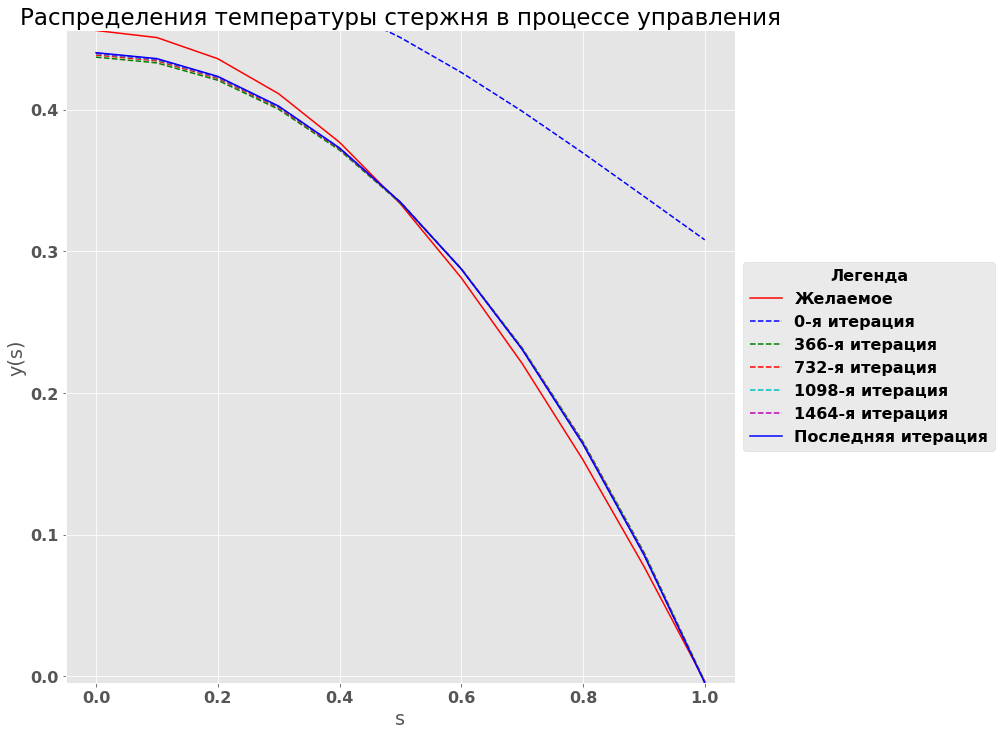

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

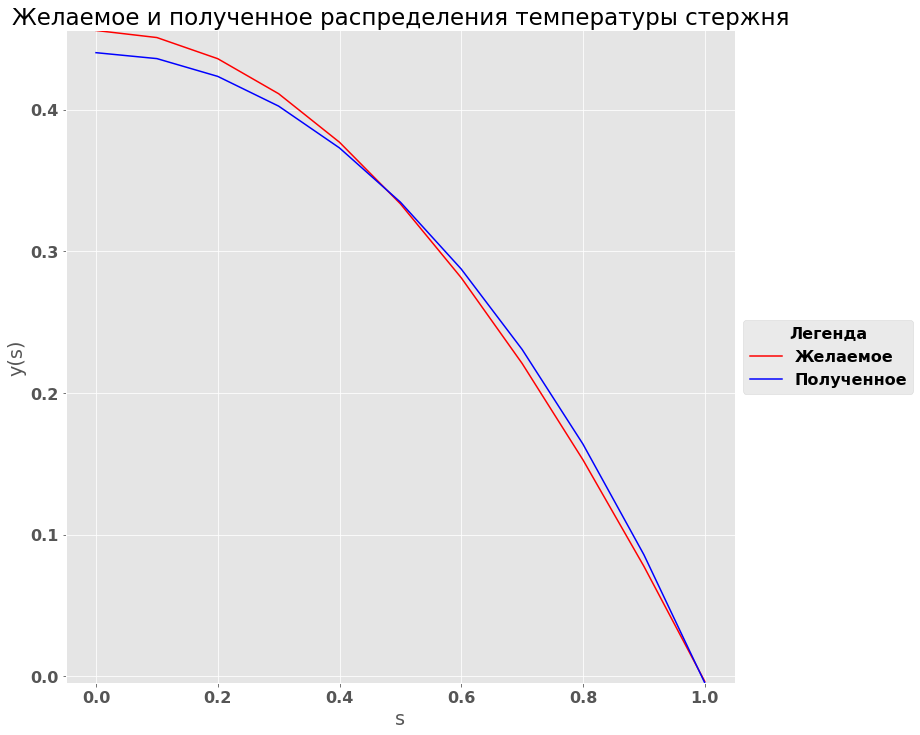

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

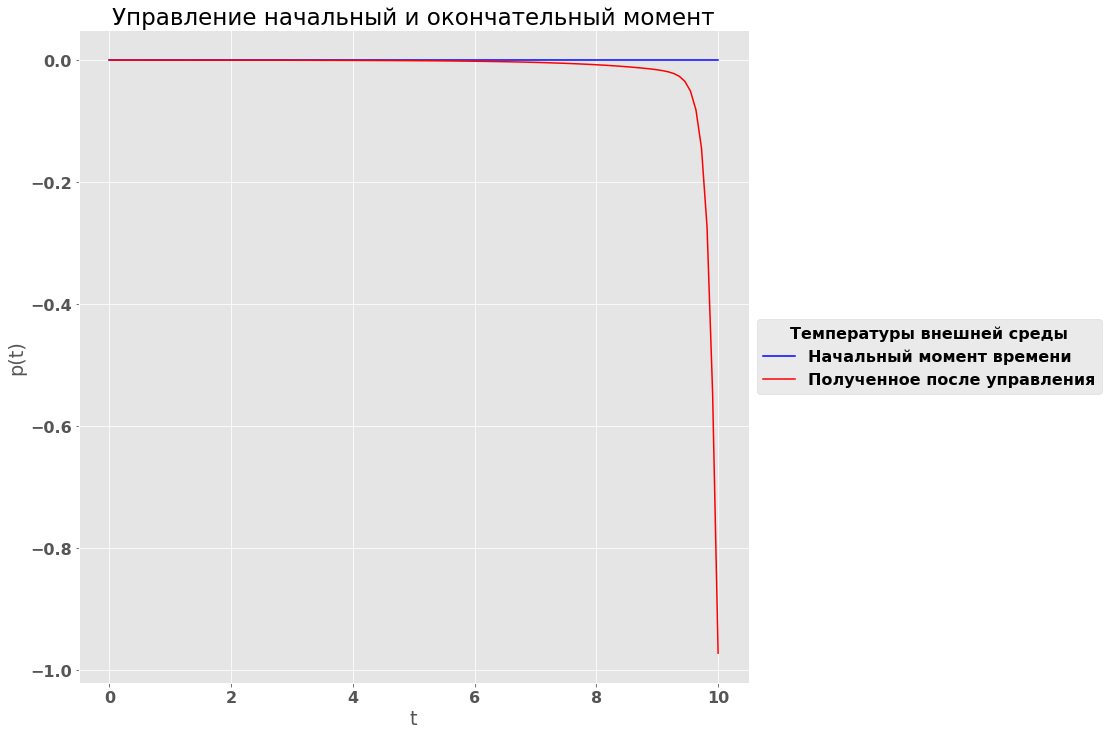

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9996144345897793e-06, 0.10000999961443459)

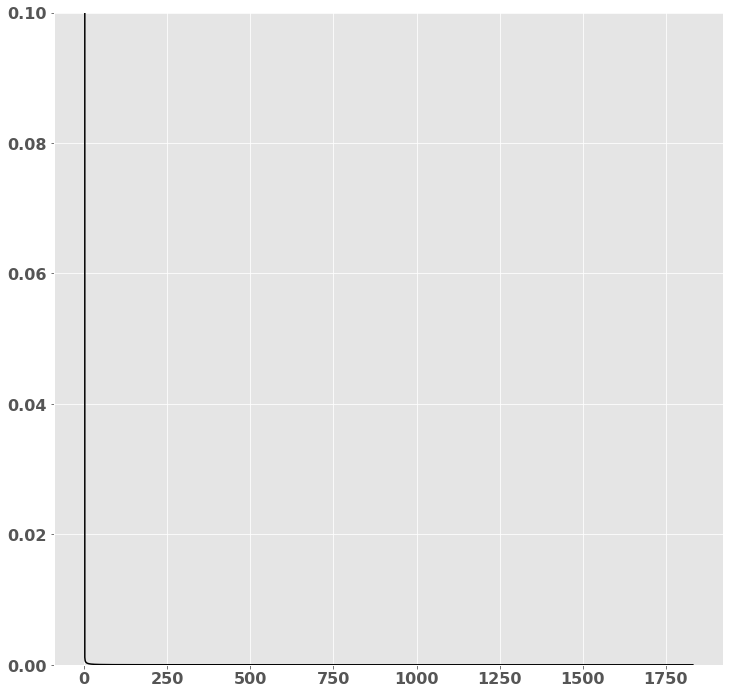

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])